In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from scipy.stats import norm 

C:\Anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
##install and import pandasdatareader
!pip install pandas_datareader
from pandas_datareader import data as pdr
##install and import yfinance
!pip install yfinance
import yfinance as yfin
yfin.pdr_override()

In [6]:
#load lickers variable for Coca Cola
ticker = ['KO'] ##KO

In [109]:
##Set start and end date
start_date = '2022-04-04'
end_date = '2023-04-04'

In [110]:
##Create dataframe
ticker = 'KO'
df_yf = pdr.get_data_yahoo(ticker,start=start_date,end=end_date)['Adj Close']
df_yf

[*********************100%***********************]  1 of 1 completed


Date
2022-04-04    60.741955
2022-04-05    60.673969
2022-04-06    61.285854
2022-04-07    61.616081
2022-04-08    61.994869
                ...    
2023-03-28    61.419998
2023-03-29    61.860001
2023-03-30    61.849998
2023-03-31    62.029999
2023-04-03    62.400002
Name: Adj Close, Length: 251, dtype: float64

In [111]:
##Calculate log returns from historical returns
stock_returns = np.log(1+df_yf.pct_change())
stock_returns.tail()

Date
2023-03-28    0.001140
2023-03-29    0.007138
2023-03-30   -0.000162
2023-03-31    0.002906
2023-04-03    0.005947
Name: Adj Close, dtype: float64

Text(10.049999999999997, 0.5, 'Frequency')

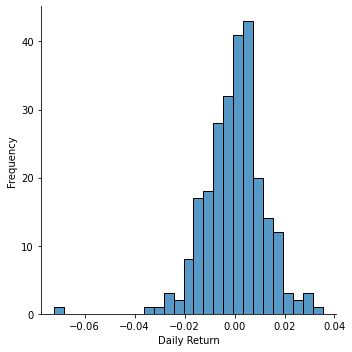

In [112]:
##Plot graph for daily returns
sns.displot(stock_returns.iloc[1:])
plt.xlabel("Daily Return")
plt.ylabel("Frequency")

<AxesSubplot:xlabel='Date'>

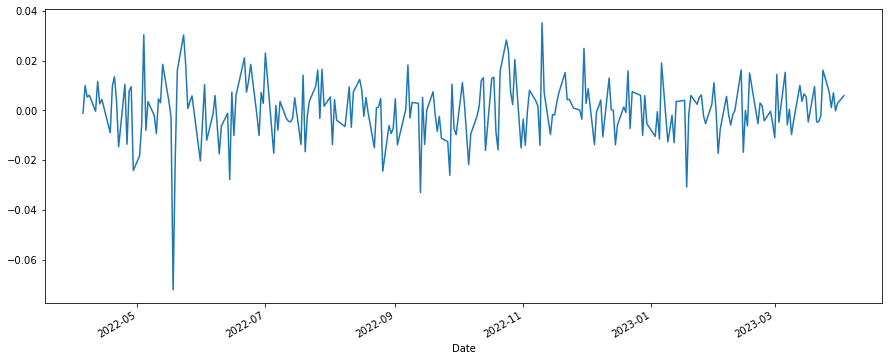

In [113]:
stock_returns.plot(figsize=(15,6))


In [114]:
u= stock_returns.mean()
var = stock_returns.var()

Calculate the drift,using following formula:
    drift=u-1/2.var
    It is best approximation of feture rate of return of the stock

In [115]:
drift = u - (0.5*var)
drift

3.7025393493610124e-05

In [116]:
stddev= stock_returns.std()
stddev

0.011890940828361897

In [117]:
type(drift)

float

In [118]:
type(stddev)

float

In [119]:
np.array(drift)

array(3.70253935e-05)

In [120]:
x= np.random.rand(10,2)
x

array([[0.40018827, 0.25619432],
       [0.93338655, 0.92058036],
       [0.06924974, 0.91436042],
       [0.78996148, 0.37517061],
       [0.67741223, 0.68706448],
       [0.80883231, 0.57097912],
       [0.30864326, 0.06049576],
       [0.51024598, 0.91303726],
       [0.24550246, 0.5821075 ],
       [0.38818783, 0.77426757]])

In [121]:
norm.ppf(x)

array([[-0.25285982, -0.65512289],
       [ 1.50149766,  1.40898607],
       [-1.48140198,  1.36810514],
       [ 0.80628761, -0.31818946],
       [ 0.46047469,  0.48754658],
       [ 0.87360138,  0.17886748],
       [-0.49969975, -1.55062527],
       [ 0.02568568,  1.35969812],
       [-0.68871137,  0.20728793],
       [-0.28404531,  0.75297512]])

In [122]:
stdev = stock_returns.std()
days= 250
iterations = 100
#Create random value with given shape in range from 0 to 1 - np.random.rand(10,2)
Z = norm.ppf(np.random.rand(days,iterations)) #days

daily_returns = e^r
r = drift +stdev.z

In [123]:
get_daily_returns = np.exp(drift + stdev*Z)

In [124]:
get_daily_returns

array([[1.00768489, 1.00341317, 1.01336684, ..., 0.98905319, 1.01043777,
        0.99701751],
       [0.98814969, 0.99468148, 0.98172358, ..., 0.9873022 , 0.98618101,
        0.99569847],
       [1.01776811, 1.00925519, 1.01610067, ..., 0.99552056, 0.99915946,
        1.00339986],
       ...,
       [0.98903617, 0.99836678, 0.98275373, ..., 0.99280355, 1.00528167,
        1.00946687],
       [1.0042822 , 0.99084259, 0.99552755, ..., 0.97313444, 0.98921236,
        1.0001676 ],
       [0.9970897 , 0.98942306, 0.99481493, ..., 0.99350873, 0.99968236,
        1.00928027]])

In [125]:
len (get_daily_returns)

250

In [126]:
S0 = df_yf.iloc[-1]
S0

62.400001525878906

In [127]:
price_paths=np.zeros_like(get_daily_returns)

In [128]:
price_paths.shape

(250, 100)

In [129]:
price_paths

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [130]:
price_paths[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [131]:
price_paths[0] = S0
price_paths

array([[62.40000153, 62.40000153, 62.40000153, ..., 62.40000153,
        62.40000153, 62.40000153],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [132]:
# Perform Monte Carlo simulation
for t in range(1,days):
    price_paths[t]= price_paths[t-1]*get_daily_returns[t]

In [133]:
price_paths

array([[62.40000153, 62.40000153, 62.40000153, ..., 62.40000153,
        62.40000153, 62.40000153],
       [61.66054236, 62.06812586, 61.25955305, ..., 61.60765893,
        61.53769661, 62.13158583],
       [62.75613379, 62.64257832, 62.24587318, ..., 61.33169106,
        61.48597196, 62.34282477],
       ...,
       [53.61954879, 43.33560977, 72.87745017, ..., 63.99547337,
        51.49396481, 63.54166327],
       [53.84915847, 42.93876762, 72.55150978, ..., 62.27619911,
        50.93846647, 63.55231314],
       [53.69244149, 42.48460683, 72.17532547, ..., 61.87194726,
        50.92228661, 64.14209546]])

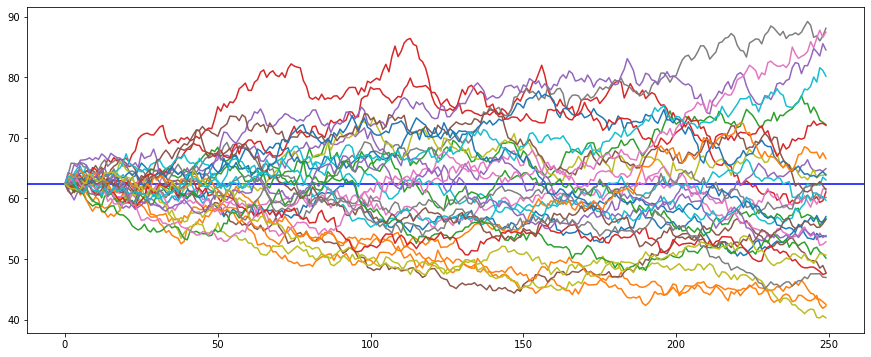

In [134]:
# Plot the simulated price series
plt.figure(figsize=(15,6))
plt.axhline(y = 62.40000, color = 'b',linestyle = '-')
plt.plot(pd.DataFrame(price_paths).iloc[:,0:30])